In [1]:
pip install Hydrograph-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Hydrograph-py: filename=Hydrograph_py-1.0.1-py3-none-any.whl size=11207 sha256=d669b5c37fdec389c1c3fc4afa85c338ec8899001afe97fe79934de04303170f
  Stored in directory: /root/.cache/pip/wheels/b5/a7/64/8e4d7ecc788f8ab99b5e948628e816a5c00af864e3fdee2a38
Successfully built Hydrograph-py


In [2]:
from Hydrograph.hydrograph import sepBaseflow, maxFlowVolStats
from Hydrograph.extreme_analysis import *
import pandas as pd
import numpy as np

In [4]:
Area = 1332   #-km2
k = 0.000546  #-m^3 s^-1 km^-2 h^-1

In [6]:
df = pd.read_csv(r'/content/Daily River Authority trends for Alutuma from 01-May-2018 to 31-Oct-2018.csv',parse_dates=[0], index_col=0, dayfirst=True)

In [7]:
df = sepBaseflow(df, 60, Area, k, dt_max=24, tp_min=6) 

Streaming output truncated to the last 5000 lines.
2018-10-05 23:00:00
2018-10-06 00:00:00
2018-10-06 01:00:00
2018-10-06 02:00:00
2018-10-06 03:00:00
2018-10-06 04:00:00
2018-10-06 05:00:00
2018-10-06 06:00:00
2018-10-06 07:00:00
2018-10-06 08:00:00
2018-10-06 09:00:00
2018-10-06 10:00:00
2018-10-06 11:00:00
2018-10-06 12:00:00
2018-10-06 13:00:00
2018-10-06 14:00:00
2018-10-06 15:00:00
2018-10-06 16:00:00
2018-10-06 17:00:00
2018-10-06 18:00:00
2018-10-06 19:00:00
2018-10-06 20:00:00
2018-10-06 21:00:00
2018-10-06 22:00:00
2018-10-06 23:00:00
2018-10-07 00:00:00
2018-10-07 01:00:00
2018-10-07 02:00:00
2018-10-07 03:00:00
2018-10-07 04:00:00
2018-10-07 05:00:00
2018-10-07 06:00:00
2018-10-07 07:00:00
2018-10-07 08:00:00
2018-10-07 09:00:00
2018-10-07 10:00:00
2018-10-07 11:00:00
2018-10-07 12:00:00
2018-10-07 13:00:00
2018-10-07 14:00:00
2018-10-07 15:00:00
2018-10-07 16:00:00
2018-10-07 17:00:00
2018-10-07 18:00:00
2018-10-07 19:00:00
2018-10-07 20:00:00
2018-10-07 21:00:00
2018-10-0

In [8]:
df.to_csv(r'/content/Separated_Baseflow.csv')

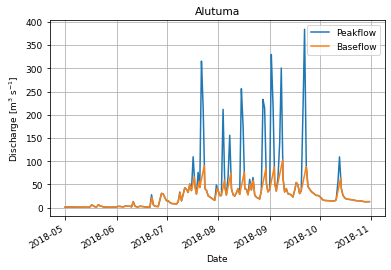

In [20]:
fig, ax = plt.subplots()
lines = plt.plot(df.index, df['Peakflow [m^3 s^-1]'] +  df['Baseflow [m^3 s^-1]'], df.index, df['Baseflow [m^3 s^-1]'])
plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Alutuma') 
plt.legend(['Peakflow', 'Baseflow'])
fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)